In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cancer = pd.read_csv("/content/drive/MyDrive/breast_cancer.csv")
print("Fitur-fitur pada data kangker :\n {}".format(cancer.keys()))
print("ukuran data : {}".format(cancer.shape))

Fitur-fitur pada data kangker :
 Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')
ukuran data : (683, 10)


In [4]:
cancer.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


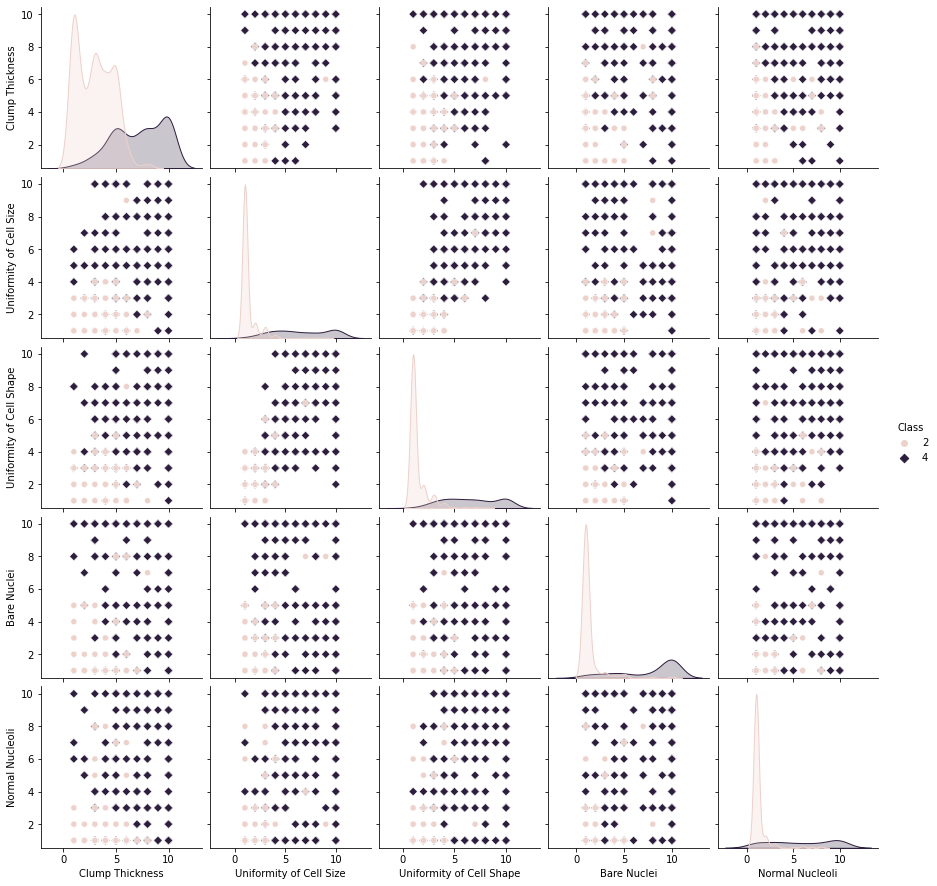

In [5]:
X = cancer.iloc[:,1:-1]
y = cancer.iloc[:,-1]
sns.pairplot(cancer, vars = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Bare Nuclei", "Normal Nucleoli"], hue = "Class", markers = ["o", "D"])

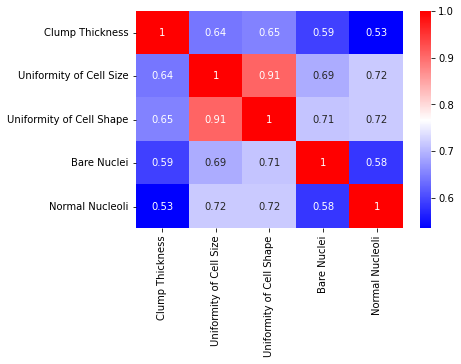

In [6]:
sns.heatmap(cancer[["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Bare Nuclei", "Normal Nucleoli"]].corr(), annot = True, cmap = "bwr")

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(546, 8)
(137, 8)
(546,)
(137,)


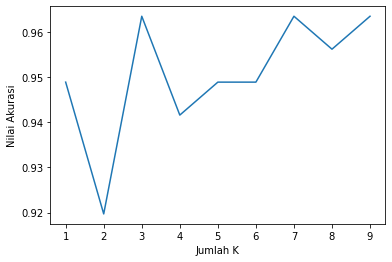

In [9]:
from sklearn.neighbors import KNeighborsClassifier

Acc = list()
k = range(1,10)

for i in (k) :
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, Y_train)
  Acc.append(knn.score(X_test, Y_test))

plt.plot(k, Acc, label = "Akurasi")
plt.xlabel("Jumlah K")
plt.ylabel("Nilai Akurasi")
plt.show()

akurasi = 96.35%


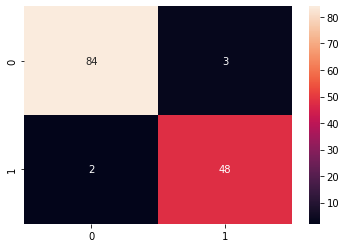

In [29]:
from sklearn.metrics import confusion_matrix

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, Y_train)
y_pred1 = knn3.predict(X_test)

cm = confusion_matrix(Y_test, y_pred1)
sns.heatmap(cm, annot=True)
print("akurasi = {:.2f}%".format(knn3.score(X_test, Y_test)*100))

akurasi = 94.89%


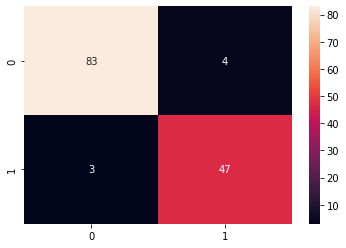

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, Y_train)
y_pred_lr = logreg.predict(X_test)

cm2 = confusion_matrix(Y_test, y_pred_lr)
sns.heatmap(cm2, annot = True) 
print("akurasi = {:.2f}%".format(logreg.score(X_test, Y_test)*100))

akurasi = 93.43%


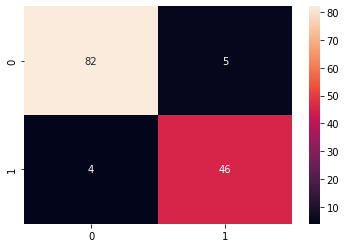

In [31]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)
y_pred_dt = tree.predict(X_test)

cm3 = confusion_matrix(Y_test, y_pred_dt)
sns.heatmap(cm3, annot=True)
print("akurasi = {:.2f}%".format(tree.score(X_test, Y_test)*100))

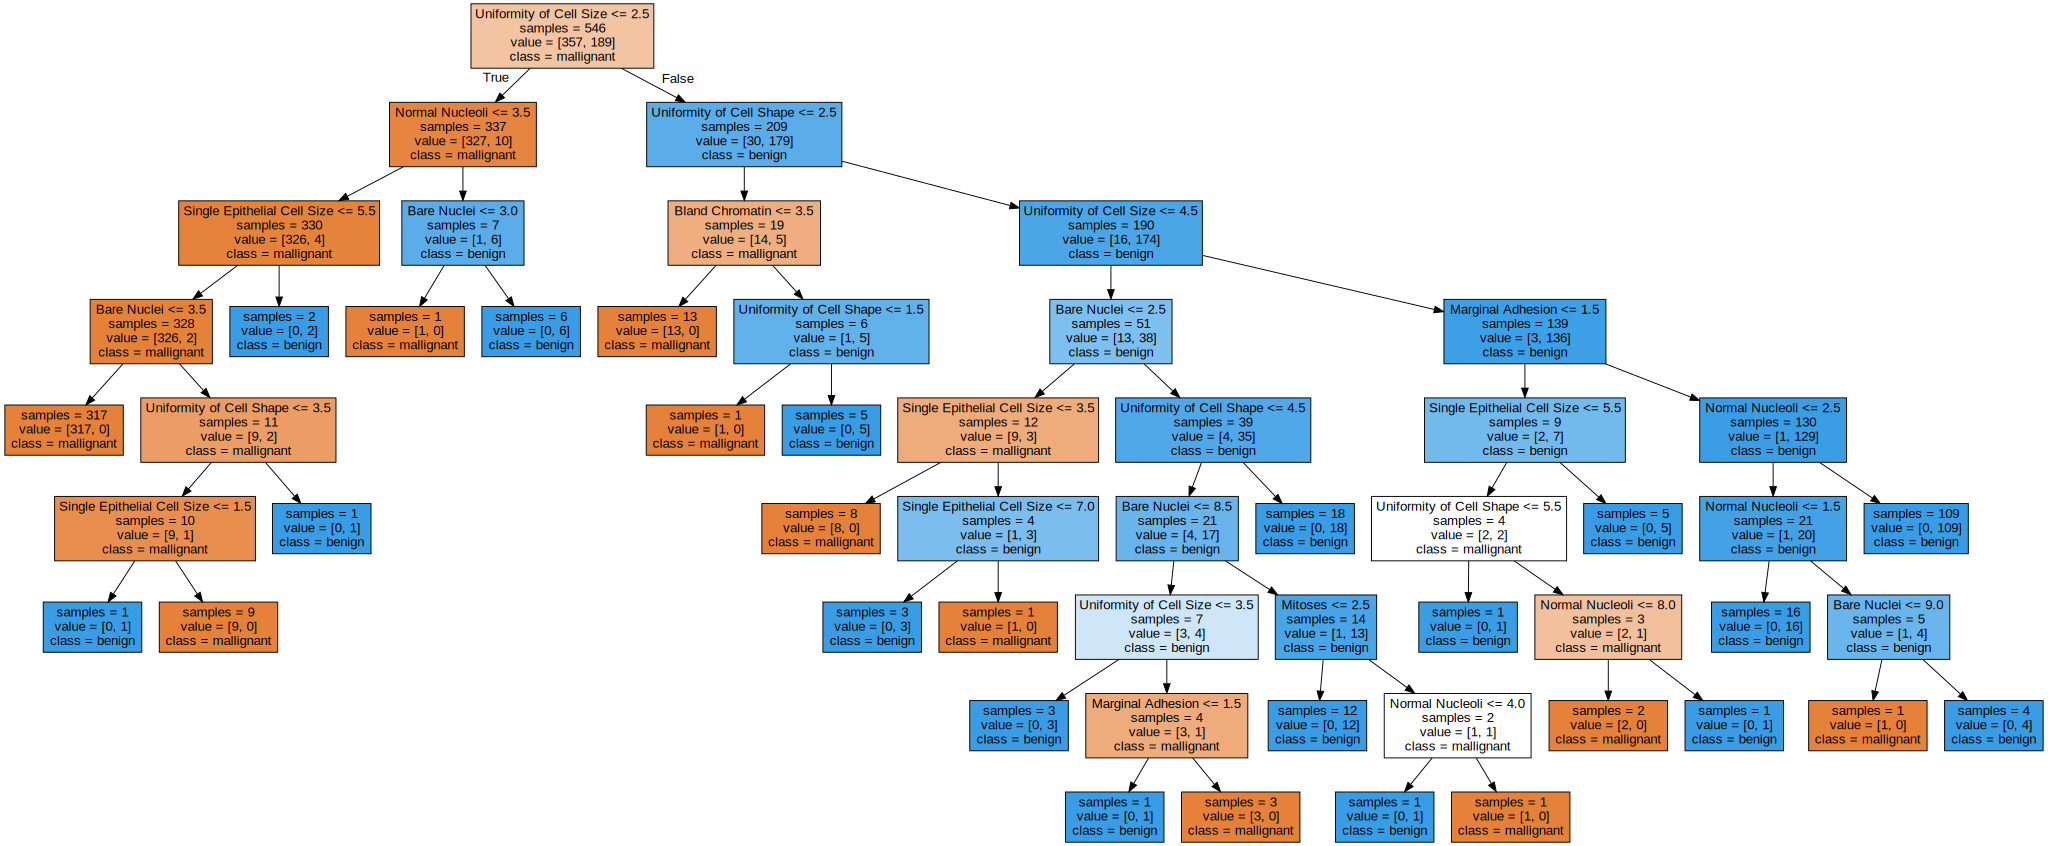

In [ ]:
fitur =list(X.keys())
export_graphviz(tree, out_file = "tree.dot", class_names = ["mallignant", "benign"], feature_names=fitur, impurity = False, filled = True)

import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

akurasi = 94.89%


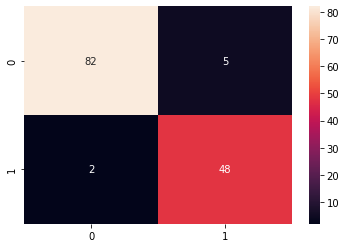

In [32]:
from sklearn.svm import SVC

svm = SVC(kernel = "rbf", random_state=0)
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)

cm4 = confusion_matrix(Y_test, y_pred_svm)
sns.heatmap(cm4, annot=True)
print("akurasi = {:.2f}%".format(svm.score(X_test, Y_test)*100))